In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [27]:
data=pd.read_csv("gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [16]:
data.shape

(5001, 8)

In [17]:
print(data.isnull().sum())


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [28]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [33]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [29]:
# Separate features and target
X = data.drop('gender', axis=1)
y = data['gender']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

# Apply 5-fold cross-validation
k_folds = 5
knn_cv_scores = cross_val_score(knn, X, y, cv=k_folds, scoring='accuracy')
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)  # Train the model on the entire dataset
# Display cross-validation results
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Cross-Validation Mean Accuracy:", knn_cv_scores.mean())

KNN Cross-Validation Scores: [0.95604396 0.958      0.976      0.963      0.974     ]
KNN Cross-Validation Mean Accuracy: 0.9654087912087912


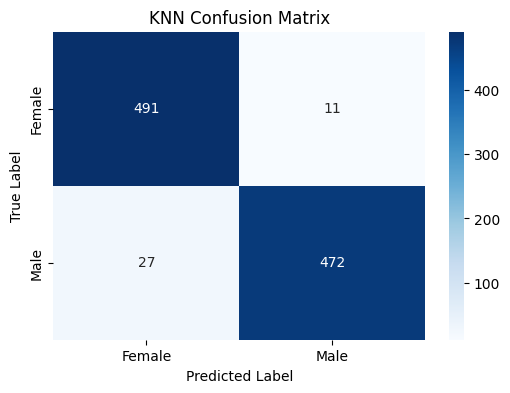

In [34]:
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")

In [31]:
# Initialize and train the weighted KNN classifier
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_weighted_knn = weighted_knn.predict(X_test)
print("Weighted KNN Accuracy:", accuracy_score(y_test, y_pred_weighted_knn))
print(classification_report(y_test, y_pred_weighted_knn))


Weighted KNN Accuracy: 0.958041958041958
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

[[485  17]
 [ 25 474]]


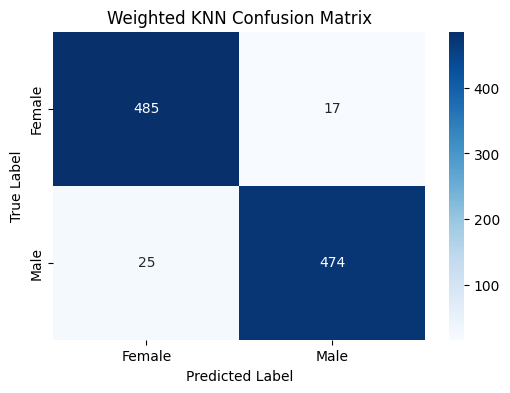

In [38]:
plot_confusion_matrix(y_test, y_pred_weighted_knn, "Weighted KNN Confusion Matrix")

In [32]:
# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.964035964035964
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

[[487  15]
 [ 21 478]]


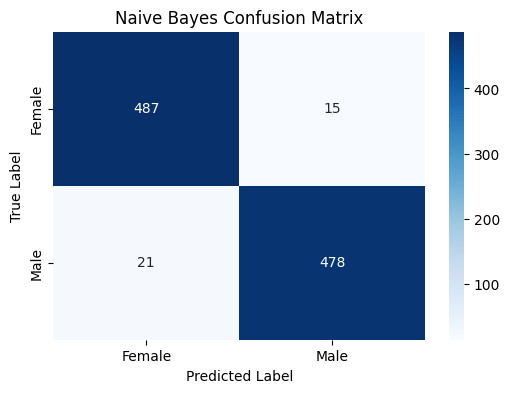

In [39]:
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")

In [45]:
def predict_gender_from_user_input():
    print("Please enter the following information:")
    
    # Prompting user input for each feature
    long_hair = int(input("Long Hair (1 for Yes, 0 for No): "))
    forehead_width_cm = float(input("Forehead Width (in cm): "))
    forehead_height_cm = float(input("Forehead Height (in cm): "))
    nose_wide = int(input("Wide Nose (1 for Yes, 0 for No): "))
    nose_long = int(input("Long Nose (1 for Yes, 0 for No): "))
    lips_thin = int(input("Thin Lips (1 for Yes, 0 for No): "))
    distance_nose_to_lip_long = int(input("Long Distance Nose to Lip (1 for Yes, 0 for No): "))

    # Create a DataFrame for the new data point
    new_data = pd.DataFrame({
        'long_hair': [long_hair],
        'forehead_width_cm': [forehead_width_cm],
        'forehead_height_cm': [forehead_height_cm],
        'nose_wide': [nose_wide],
        'nose_long': [nose_long],
        'lips_thin': [lips_thin],
        'distance_nose_to_lip_long': [distance_nose_to_lip_long]
    })

    # Standardize the new data using the fitted scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Predict gender for the new data
    prediction = knn.predict(new_data_scaled)
    predicted_gender = label_encoder.inverse_transform(prediction)
    
    # Display the result
    print("Predicted Gender:", predicted_gender[0])

# Call the function to make predictions based on user input
predict_gender_from_user_input()

Please enter the following information:
Long Hair (1 for Yes, 0 for No): 1
Forehead Width (in cm): 0
Forehead Height (in cm): 1
Wide Nose (1 for Yes, 0 for No): 1
Long Nose (1 for Yes, 0 for No): 0
Thin Lips (1 for Yes, 0 for No): 1
Long Distance Nose to Lip (1 for Yes, 0 for No): 1
Predicted Gender: Female


C:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
